In [36]:
import pandas as pd
import pyxlsb as pxl
import seaborn as sn
import matplotlib.pyplot as plt

In [26]:
blood_pressure = pd.read_sas('data/blood-pressure.XPT')
body_measure = pd.read_sas('data/body-measure.XPT')
demographic_var = pd.read_sas('data/demographic-variables.XPT')

In [27]:
merge_dfs = pd.merge(blood_pressure, body_measure, on='SEQN')
df = pd.merge(merge_dfs, demographic_var, on ='SEQN')

In [28]:
df = df[["RIDAGEYR", "BMXBMI", "BPXSY1"]]
df.head()

,RIDAGEYR,BMXBMI,BPXSY1
0,62.0,27.8,128.0
1,53.0,30.8,146.0
2,78.0,28.8,138.0
3,56.0,42.4,132.0
4,42.0,20.3,100.0


In [29]:
df.rename(columns={'RIDAGEYR': 'age', 'BMXBMI': 'IMC', "BPXSY1": "PAS"}, inplace=True)
df

,age,IMC,PAS
0,62.0,27.8,128.0
1,53.0,30.8,146.0
2,78.0,28.8,138.0
3,56.0,42.4,132.0
4,42.0,20.3,100.0
...,...,...,...
9539,2.0,NaN,NaN
9540,6.0,18.2,NaN
9541,35.0,26.0,104.0
9542,8.0,18.1,114.0


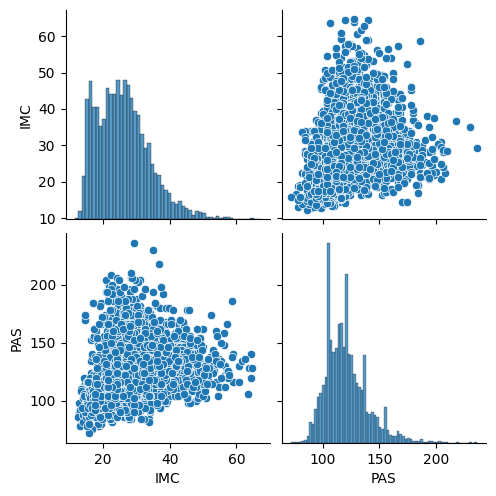

In [35]:
base = df[['IMC','PAS']]
sn.pairplot(base)

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [56]:
base = base.dropna()

x = base.iloc[:,0].values
y = base.iloc[:,1].values

correlacao = np.corrcoef(x,y)
x = x.reshape(-1,1)

x

array([[27.8],
       [30.8],
       [28.8],
       ...,
       [26. ],
       [18.1],
       [21.4]])

In [57]:
regressor = LinearRegression()
regressor.fit(x,y)

""" regressor.coef_
regressor.intercept_ """
#yPred = regressor.predict(x)

' regressor.coef_\nregressor.intercept_ '

Text(0, 0.5, 'PAS')

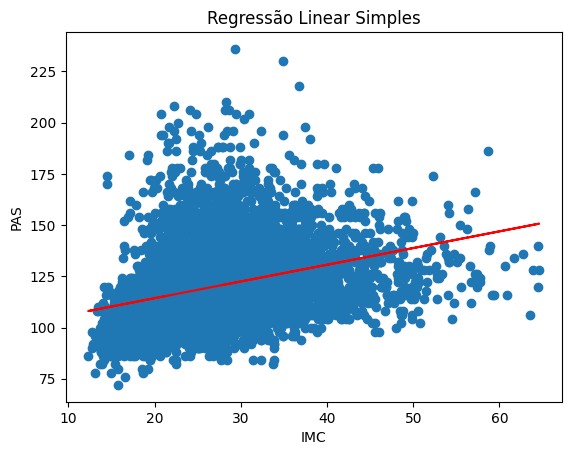

In [58]:
plt.scatter(x,y)
plt.plot(x, regressor.predict(x), color="red")
plt.title("Regressão Linear Simples")
plt.xlabel("IMC")
plt.ylabel("PAS")

In [74]:
#previsao1 = regressor.predict(25)
x=25
x = np.array(x).reshape(1, -1)
previsao1 = regressor.predict(x)
previsao1

array([118.41690348])